# Explaining the topic modeling
* must be there a normalization for the dataset
* min the diversity in the dataset

In [ ]:
!pip install bertopic==0.16.0 datasets==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.7 MB/s eta 0:00:00
INFO: pip

In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import nltk
from datetime import datetime
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def clean_txt(txt:str):
  if not isinstance(txt, str):
     # if we have any column numers
    # raise TypeError("must be a string")
    return ""

# any url in the txt i did not need it so i can remove it but , we can put any word replacement for it ...
  txt = re.sub(r"http\S+", " رابط ", txt)
# replace any digit with number
  txt = re.sub(r"\d+", " رقم ", txt)
# set spaces before and after  any puncutation
  txt = re.sub(r"([^\w\s])", r" \1 ", txt)
# if we have more than space delete them and put only one (remove extra spaces)
  txt = re.sub(r"\s+", " ", txt)
# map the words and then combine them with spaces (takes alot of time )
  words = word_tokenize(txt)
  txt = " ".join([w for w  in words if len(w)> 1])
  return txt.lower().strip()

In [ ]:
ar_dataset = load_dataset("saudinewsnet")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/31030 [00:00<?, ? examples/s]

In [ ]:
ar_dataset["train"][5]

{'source': 'aawsat',
 'url': 'http://aawsat.com/home/article/410411/مذبحة-حوثية-في-عدن-والمقاومة-تزحف-نحو-القصر',
 'date_extracted': '2015-07-21 02:51:40',
 'title': 'مذبحة حوثية في عدن.. والمقاومة تزحف نحو القصر',
 'author': 'صنعاء: عرفات مدابش -  الرياض: ناصر الحقباني',
 'content': 'ارتكبت الميليشيات الحوثية مجزرة في مدينة عدن، جنوب اليمن، بعدما أمطرت ضاحية دار سعد شمال المدينة بصواريخ الكاتيوشا وقنابل الهاون مما أدى إلى مقتل 43 مدنيا على الأقل وإصابة 173.\n\n وجاء هذا القصف بينما استمرت الاشتباكات في دار سعد وصبر وفي منطقة المعاشيق بمديرية كريتر في شمال المدينة، فيما واصل عناصر المقاومة الشعبية زحفهم نحو القصر الرئاسي في حي التواهي لتحريره من سيطرة المتمردين، وذلك بعد أيام من إعلان حكومة الرئيس اليمني عبد ربه منصور هادي تحرير المدينة باستثناء جيوب لميليشيات الحوثيين وحليفهم الرئيس السابق علي عبد الله صالح.\n\n ودخلت «المقاومة الشعبية» ليلا إلى حي التواهي، وقال مصدر عسكري إن تلك القوات «تتقدم باتجاه قصر رئاسة الجمهورية ومقر قيادة الفرقة الرابعة للجيش»، كما مشطت مقر الإذاعة والتلفزيون

In [ ]:
raw_dataset = [
    {
        "text":rec["content"],
        "source":rec["source"],
        "date":rec["date_extracted"]
    }

    for rec in ar_dataset["train"]
]

In [ ]:
df_raw_dataset = pd.DataFrame(raw_dataset)
df_raw_dataset.shape

(31030, 3)

In [ ]:
df_raw_dataset.head()

,text,source,date
0,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...,aawsat,2015-07-21 02:51:32
1,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...,aawsat,2015-07-21 02:51:33
2,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...,aawsat,2015-07-21 02:51:35
3,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...,aawsat,2015-07-21 02:51:37
4,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...,aawsat,2015-07-21 02:51:38


In [ ]:
from random import random
# shuffling the datasets
df_raw_dataset = df_raw_dataset.sample(frac = 1, random_state = 101)


In [ ]:
df_raw_dataset["text"] = df_raw_dataset["text"].apply(clean_txt)

In [ ]:
df_raw_dataset["text_lenth"] = df_raw_dataset["text"].apply(len)
df_raw_dataset.head()

,text,source,date,text_lenth
26442,عين اليوم الدمام عقدت أمانة المنطقة الشرقية ال...,3alyoum,2015-08-09 20:45:39,1094
24574,`` لم نر الإرهاب إلا بعد تسييس الدين ليصير الو...,alwatan,2015-08-07 06:32:39,3378
20441,رغد عشميل عين اليوم عزز فريق ريال مدريد الإسبا...,3alyoum,2015-08-06 19:16:04,1872
7927,أوضحت إدارة مستشفى الدوادمي العام في بيان لها ...,alriyadh,2015-07-24 16:23:27,429
14012,الشعر الجميل يبقى محفورا في الذاكرة لا يمحي من...,alriyadh,2015-07-31 03:53:17,1049


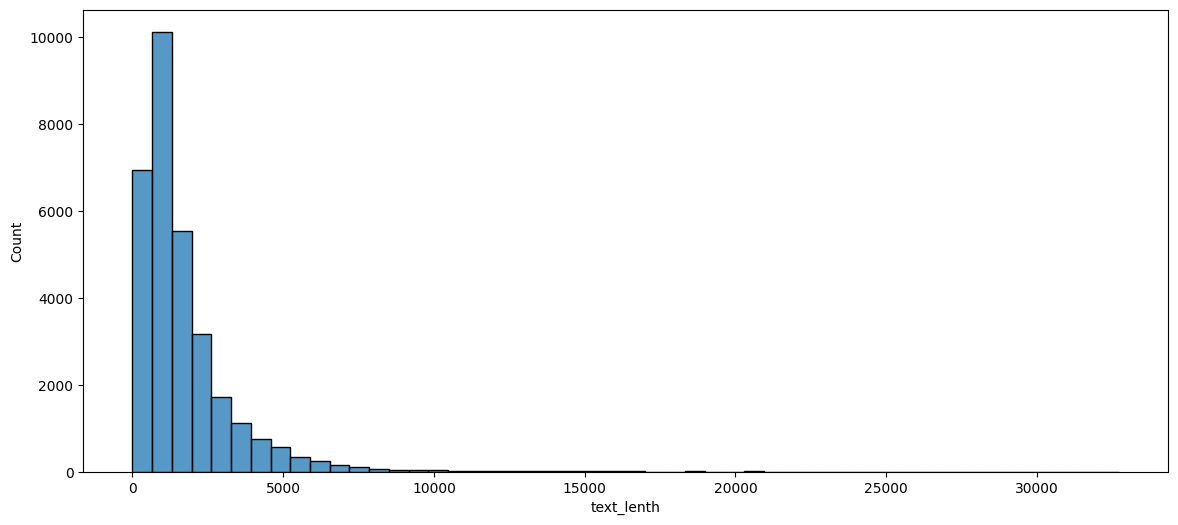

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(df_raw_dataset["text_lenth"], bins = 50)
plt.show()

In [ ]:
print(df_raw_dataset.shape)
df_raw_dataset = df_raw_dataset[df_raw_dataset["text_lenth"] <= 10_000]
print(df_raw_dataset.shape)

(31030, 4)
(30902, 4)


In [ ]:
print(df_raw_dataset.shape)
df_raw_dataset.drop_duplicates(["text"], inplace = True)
print(df_raw_dataset.shape)

(30902, 4)
(29691, 4)


In [ ]:
df_raw_dataset["date_stamp"] = df_raw_dataset["date"].apply(lambda v : datetime.strptime(v, "%Y-%m-%d %H:%M:%S"))
df_raw_dataset["date_stamp"] = df_raw_dataset["date_stamp"].apply(lambda v : v.replace(hour=0, minute=0, second=0))

# BERTopic Modular Framework




word embedding

In [ ]:
from sentence_transformers import SentenceTransformer
# try to use different emdedding model
# model_id = "sentence-transformers/distiluse-base-multilingual-cased-v2"
model_id = "sentence-transformers/LaBSE"
embedded_model = SentenceTransformer(model_id, device = "cuda")

.gitattributes:   0%|          | 0.00/391 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

In [ ]:
new_embedding = embedded_model.encode(df_raw_dataset["text"].values, show_progress_bar= True)

Batches:   0%|          | 0/928 [00:00<?, ?it/s]

In [ ]:
new_embedding.shape

(29691, 768)

In [ ]:
df_raw_dataset["text"].values[0]

'عين اليوم الدمام عقدت أمانة المنطقة الشرقية اليوم ورشة عمل حول مبادرات وتوجيهات وزارة الشؤون البلدية والقروية حول التخطيط الاستراتيجي ومناقشتها بحضور أمين المنطقة الشرقية بالإنابة المهندس جمال بن ناصر الملحم وذلك في قاعة الاجتماعات الرئيسية بمقر الأمانة في الدمام واستعرض مدير إدارة التخطيط الاستراتيجي بالأمانة المهندس سامي بن حمد القروني خلال الورشة عدد من مبادرات الوزارة منها تطوير عملية التخطيط الحضري ليشمل الأبعاد والجوانب الاقتصادية والاجتماعية والبيئية والعمرانية والثقافية وتحسين التقييم الاقتصادي للمشاريع وإدارة تنفيذها وبناء أطر الشراكات والتعاون بين القطاع العام والقطاع الخاص في مجال إدارة وتقديم الخدمات البلدية وأوضح مدير عام إدارة العلاقات العامة والإعلام المتحدث الإعلامي بأمانة المنطقة الشرقية محمد بن عبدالعزيز الصفيان أن ورشة العمل خلصت إلى توصيات عامة تمث لت في الارتقاء بأوضاع المدن وتطوير إدارة التنمية الحضرية والاجتماعية والاقتصادية والبيئية والثقافية وتحسين المرافق والتجهيزات الأساسية وإدارة التنفيذ والارتقاء بمستوى جودة الخدمات العامة كما تضمنت التوجيهات كذلك العمل ال

In [ ]:
new_embedding[0]

array([-1.67960506e-02, -4.62578312e-02, -2.86064260e-02,  6.65431004e-03,
       -7.20104352e-02,  4.96060848e-02, -2.71093827e-02,  4.14116941e-02,
        4.93271947e-02,  7.37262471e-03, -3.35612968e-02, -2.49695852e-02,
       -4.99700792e-02,  5.92021570e-02,  9.06411745e-03,  2.15223618e-02,
        3.58014591e-02, -3.42024527e-02, -3.06137577e-02,  3.37783843e-02,
        4.24083285e-02, -6.55443743e-02, -5.98193444e-02,  3.90620753e-02,
        2.26927213e-02, -4.46792059e-02, -2.69029234e-02,  7.52603542e-03,
       -1.99563941e-03, -7.08163753e-02,  3.95765752e-02, -2.52100881e-02,
       -6.27188990e-03, -8.12283542e-05, -3.74609753e-02, -4.73333783e-02,
       -7.36772865e-02, -2.95348130e-02,  4.17762026e-02, -3.81801762e-02,
        6.58031628e-02, -6.00678064e-02, -7.45499581e-02,  1.97072886e-03,
       -3.84626351e-02, -3.86687480e-02, -2.37264484e-02, -1.48797007e-02,
       -4.18655127e-02, -5.30618802e-02, -8.66774842e-03, -1.27885835e-02,
        5.03199697e-02,  

dim reducation

In [ ]:
from umap import UMAP
umap_model = UMAP(n_neighbors=15, n_components=5 , min_dist=0.0, metric="cosine", random_state=101)

clustering

In [ ]:
from hdbscan import HDBSCAN
# higher min_cluster_size will generate few topic
# law min_cluster_size will generate few topics
hdbscan_model = HDBSCAN(min_cluster_size=50, metric="euclidean", cluster_selection_method="eom", prediction_data=True)

vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stp


stop_words = stp.stopwords_list()
# ignore the words that not mentioned at least two in two documents
count_vectorizer_model = CountVectorizer(min_df= 3, stop_words=stop_words, analyzer="word", max_df= 0.5, ngram_range= (1,3))

topic representer

In [ ]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()
representatopn_model = {
    "KeyBERT": keybert_model
}

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(
    # pipeline models
    embedding_model = embedded_model,
    umap_model = umap_model,
    hdbscan_model= hdbscan_model,
    vectorizer_model= count_vectorizer_model,
    representation_model= representatopn_model,
    # hyperparameter
    top_n_words  = 10,
    verbose  = True
)
# take 2 parameters the texr and embedding
topics, prob_topics = topic_model.fit_transform(
    df_raw_dataset["text"].values,
    new_embedding
)

2024-01-19 07:52:59,268 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-01-19 07:53:42,497 - BERTopic - Dimensionality - Completed ✓
2024-01-19 07:53:42,500 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-19 07:53:51,589 - BERTopic - Cluster - Completed ✓
2024-01-19 07:53:51,654 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-19 07:56:38,534 - BERTopic - Representation - Completed ✓


In [ ]:
# (-1) --> noise
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,9694,-1_في_من_رقم_على,"[في, من, رقم, على, أن, إلى, التي, بن, عن, أو]","[السعودية, محمد, عبدالعزيز, لا, ولا, كل, العرب...",[إن أي إنسان في هذا الوطن المعطاء وطن الخير وا...
1,0,4135,0_الفريق_القدم_النادي_الاتحاد,"[الفريق, القدم, النادي, الاتحاد, الموسم, في, ا...","[فريقه, فريق, للفريق, الفيفا, الأندية, الفريق,...",[بدأ الفريق الهلالي استعداداته لهذا الموسم في ...
2,1,916,1_الله_الطوارئ_الأمن_الإرهابي,"[الله, الطوارئ, الأمن, الإرهابي, من, الإرهاب, ...","[الإرهابية, الإسلامية, الإرهابي, الإرهاب, المس...",[أدانت مملكة البحرين التفجير الإرهابي الذي است...
3,2,885,2_الوزارة_العمل_وزارة_من,"[الوزارة, العمل, وزارة, من, على, رقم, الإسكان,...","[مشروع, المشروع, المشروعات, مشروعات, المشاريع,...",[يشهد التداول العقاري في المملكة خاصة قطاع الو...
4,3,705,3_المهرجان_مهرجان_فعاليات_الفعاليات,"[المهرجان, مهرجان, فعاليات, الفعاليات, من, الم...","[المهرجانات, للمهرجان, المهرجان, مهرجان, الفعا...",[يرعى صاحب السمو الملكي الأمير فيصل بن خالد بن...
...,...,...,...,...,...,...
79,78,59,78_البحرين_مملكة_الإيرانية_التصريحات,"[البحرين, مملكة, الإيرانية, التصريحات, إيران, ...","[الإيرانية, الإيراني, إيران, إيرانيين, البحرين...",[أكد معالي الفريق الركن الشيخ راشد بن عبدالله ...
80,79,56,79_كورونا_حالة_الصحة_حالات,"[كورونا, حالة, الصحة, حالات, بفيروس, للشفاء, ا...","[الصحة, الصحية, بالمرض, الرياض, الفيروس, المرض...",[نفذت رئيسة كوريا الجنوبية باك جون أمس وعدها ب...
81,80,55,80_عكاظ_سوق_لسوق_الفيصل,"[عكاظ, سوق, لسوق, الفيصل, الإشرافية, الشعرية, ...","[الملك, الأمير, خالد, أمير, المملكة, عبدالعزيز...",[تحت رعاية خادم الحرمين الشريفين الملك سلمان ب...
82,81,51,81_التحرش_المرأة_أو_لا,"[التحرش, المرأة, أو, لا, المتحرش, أن, قانون, ل...","[للتحرش, بالتحرش, مجتمعنا, بالنساء, العقوبات, ...",[كثر الحديث عن التحرش بالنساء في وسائل الاعلام...


In [ ]:
!pip install Arabic-Stopwords==0.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 15.9 MB/s eta 0:00:00


after use arabic stop words

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,9694,-1_السياحية_عدن_السياحة_رقم رقم مليار,"[السياحية, عدن, السياحة, رقم رقم مليار, اليمني...","[الملك عبدالعزيز, الأمير محمد, آل سعود, الأمير...",[وصلت امس الطائرة الإغاثية السعودية الخامسة إل...
1,0,4135,0_القدم_النادي_الموسم_اللاعب,"[القدم, النادي, الموسم, اللاعب, اللاعبين, لكرة...","[السعودي لكرة القدم, كأس العالم, الأول لكرة ال...",[وصلت بعثة فريق الهلال الكروي الأول إلى العاصم...
2,1,916,1_قوات الطوارئ_الإرهابي_الإرهاب_مسجد,"[قوات الطوارئ, الإرهابي, الإرهاب, مسجد, عسير, ...","[تفجير مسجد, التفجير الإرهابي, الإرهابي استهدف...",[أدانت مملكة البحرين التفجير الإرهابي الذي است...
3,2,885,2_الإسكان_نزع_البلدية_الحج,"[الإسكان, نزع, البلدية, الحج, نزع ملكية, ملكية...","[وزير الإسكان, مشروعات, الشؤون البلدية والقروي...",[وافق وزير الشؤون البلدية والقروية عبد اللطيف ...
4,3,705,3_المهرجان_مهرجان_فعاليات_الفعاليات,"[المهرجان, مهرجان, فعاليات, الفعاليات, المسرحي...","[فيصل خالد عبدالعزيز, الأمير فيصل خالد, خالد ع...",[يرعى صاحب السمو الملكي الأمير فيصل بن خالد بن...
...,...,...,...,...,...,...
79,78,59,78_البحرين_مملكة البحرين_مملكة_الإيرانية,"[البحرين, مملكة البحرين, مملكة, الإيرانية, الت...","[التدخلات الإيرانية الشأن, التدخلات الإيرانية,...",[عين اليوم المنامة أكد الفريق الركن الشيخ راشد...
80,79,56,79_كورونا_رقم حالة_بفيروس كورونا_وزارة الصحة,"[كورونا, رقم حالة, بفيروس كورونا, وزارة الصحة,...","[أعلنت وزارة الصحة, وزارة الصحة اليوم, وزارة ا...",[أعلنت وزارة الصحة اليوم السبت تسجيل حالة إصاب...
81,80,55,80_سوق عكاظ_لسوق عكاظ_خالد الفيصل_الأمير خالد ...,"[سوق عكاظ, لسوق عكاظ, خالد الفيصل, الأمير خالد...","[الملكي الأمير خالد, الأمير خالد الفيصل, سمو ا...",[تحت رعاية خادم الحرمين الشريفين الملك سلمان ب...
82,81,51,81_التحرش_المتحرش_للتحرش_تحرش,"[التحرش, المتحرش, للتحرش, تحرش, الجنسي, المتحر...","[التحرش بالنساء, التحرش الجنسي, قانون مكافحة ا...",[كثر الحديث عن التحرش بالنساء في وسائل الاعلام...


after use LaBSE

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,10391,-1_مليار_داعش_رقم مليار_السمو,"[مليار, داعش, رقم مليار, السمو, اليمن, السمو ا...","[الملك سلمان عبدالعزيز, عبدالعزيز آل سعود, الش...",[استقبل نائب خادم الحرمين الشريفين صاحب السمو ...
1,0,2915,0_النادي_اللاعبين_القدم_اللاعب,"[النادي, اللاعبين, القدم, اللاعب, نادي, الهلال...","[النادي الأهلي, الأهلي, السعودي لكرة القدم, ال...",[تترقب الجماهير السعودية عودة كثير من الأسماء ...
2,1,1021,1_إيران_الاتفاق_النووي_الإيراني,"[إيران, الاتفاق, النووي, الإيراني, الاتفاق الن...","[الاتفاق النووي إيران, الاتفاق النووي, النووي ...",[أك الرئيس الإيراني حسن روحاني خلال ترؤسه جلسة...
3,2,774,2_يونايتد_الدوري_الموسم_مانشستر,"[يونايتد, الدوري, الموسم, مانشستر, سيتي, مدريد...","[تشيلسي, مانشستر سيتي, الدوري الإنجليزي, مانشس...",[يبدو أن المنافسة ستكون حامية في الموسم الجديد...
4,3,517,3_المشاريع_وإنشاء_البلدية_الأمانة,"[المشاريع, وإنشاء, البلدية, الأمانة, المرورية,...","[تنفيذ مشروع, مشروعات, المشروعات, ومشروع, المش...",[اعتمد معالي وزير الشئون البلدية والقروية المه...
...,...,...,...,...,...,...
93,92,55,92_حرس_حرس الحدود_البحث والإنقاذ_والإنقاذ,"[حرس, حرس الحدود, البحث والإنقاذ, والإنقاذ, ال...","[فرق البحث والإنقاذ, البحث والإنقاذ, والإنقاذ,...",[باشرت فرق البحث والإنقاذ في قطاعات حرس الحدود...
94,93,54,93_عدن_مطار عدن_المطار_طائرة,"[عدن, مطار عدن, المطار, طائرة, عدن الدولي, الح...","[مطار عدن الدولي, وصلت مطار عدن, مطار عدن, بمط...",[وصلت أمس إلى مطار عدن الدولي أول طائرة مساعدا...
95,94,53,94_بالعيد_فرحة_يوم العيد_الفرح,"[بالعيد, فرحة, يوم العيد, الفرح, الأم, فرحة ال...","[أيام العيد, الأعياد, العيد الماضي, الناس الما...",[اتفق الكثير من كبار السن في المدينة المنورة ع...
96,95,52,95_الحملة_السوريين_الوطنية السعودية_الأشقاء,"[الحملة, السوريين, الوطنية السعودية, الأشقاء, ...","[للأشقاء اللاجئين السوريين, اللاجئين السوريين,...",[أنهت الحملة الوطنية السعودية المرحلة الثالثة ...


simple exampel for the sureance of the mdodel

In [ ]:
df_raw_dataset["text"].values[50]

'بعد مرور رقم سنوات على تشييد جدار الفصل العنصري في القدس تحولت الأحياء الفلسطينية في القدس إلى منطقة عشوائية وعزل ثلث السكان الفلسطينيين المقدر عددهم بـ رقم ألفا عن مركز حياتهم في القدس وباتوا يعانون من حياة قوامها الإهمال المخزي وشي الجدار في القدس بعد أن التزمت الحكومة الإسرائيلية أمام المحكمة الإسرائيلية العليا وأصدرت قرارات حكومية تعهدت باستمرار سير الحياة السوي لدى سكان الأحياء المقدسي الذين ظل وا وراء الجدار إلى جانب الحفاظ على نسيج الحياة المشترك لمجمل السكان الفلسطينيين عبر جهتي الجدار ولفتت جمعية حقوق المواطن في إسرائيل في أحدث تقرير لها أمس إلى أن من بين هذه القرارات القرار رقم الذي اتخذ في رقم الذي فرض مسؤولية تحضير الجاهزية الخاصة على بلدية القدس والوزارات الإسرائيلية المختلفة مشددا على أن تشييد الجدار لا يعني المس بحقوق سكان الأحياء الذين يعيشون في المنطقة التي احتلتها إسرائيل عام رقم ويحملون بطاقات هوي إسرائيلية مستندا على الإدراك بأن من واجب إسرائيل منذ لحظة فرض سيادتها على أحياء القدس الشرقي بعد احتلالها الحفاظ أيضا على مجمل الحقوق المكفولة لكل ساكن وفق للقانونيين الإس

In [ ]:
topics[50], prob_topics[50]

(16, 0.7036451984101788)

In [ ]:
topic_model.get_topic(16)

[('الاحتلال', 0.038711331588064855),
 ('الإسرائيلية', 0.03050667931137601),
 ('الإسرائيلي', 0.02634939215362764),
 ('الفلسطينية', 0.0256012329261761),
 ('الفلسطيني', 0.024885030270970655),
 ('المستوطنين', 0.02438912275518202),
 ('الفلسطينيين', 0.023591441968728716),
 ('الأقصى', 0.02246135287757923),
 ('دوابشة', 0.022257127332267083),
 ('إسرائيل', 0.022055386407061124)]

In [ ]:
df_raw_dataset["topic"] = topics
df_raw_dataset["prob"] = prob_topics
df_raw_dataset.head()

,text,source,date,text_lenth,date_stamp,topic,prob
26442,عين اليوم الدمام عقدت أمانة المنطقة الشرقية ال...,3alyoum,2015-08-09 20:45:39,1094,2015-08-09 20:45:39,-1,0.00000
24574,`` لم نر الإرهاب إلا بعد تسييس الدين ليصير الو...,alwatan,2015-08-07 06:32:39,3378,2015-08-07 06:32:39,-1,0.00000
20441,رغد عشميل عين اليوم عزز فريق ريال مدريد الإسبا...,3alyoum,2015-08-06 19:16:04,1872,2015-08-06 19:16:04,2,1.00000
7927,أوضحت إدارة مستشفى الدوادمي العام في بيان لها ...,alriyadh,2015-07-24 16:23:27,429,2015-07-24 16:23:27,18,0.55733
14012,الشعر الجميل يبقى محفورا في الذاكرة لا يمحي من...,alriyadh,2015-07-31 03:53:17,1049,2015-07-31 03:53:17,-1,0.00000


In [ ]:
df_raw_dataset[df_raw_dataset["topic"] == 16].head(10)

,text,source,date,text_lenth,date_stamp,topic,prob
16259,واس المنامة دانت مملكة البحرين أمس بشدة العمل ...,sabq,2015-08-01 07:51:31,701,2015-08-01 07:51:31,16,1.000000
28697,بعد مرور رقم سنوات على تشييد جدار الفصل العنصر...,alwatan,2015-08-10 19:41:59,1861,2015-08-10 19:41:59,16,0.703645
10659,طالبت وزارة الخارجية الفلسطينية اليوم الأحد بت...,alriyadh,2015-07-26 17:21:56,1225,2015-07-26 17:21:56,16,0.724907
20658,عاشت حفصة الدوابشة مثل آخرين ليلة رعب حقيقية ت...,aawsat,2015-08-06 02:37:02,1329,2015-08-06 02:37:02,16,0.705027
20654,بعد تكرار عمليات القتل حرق اشتعلت إسرائيل بجدل...,aawsat,2015-08-06 02:36:57,2935,2015-08-06 02:36:57,16,0.381273
12434,أكدت الأمانة العامة لهيئة كبار العلماء ما للمق...,alweeam,2015-07-27 16:56:19,1323,2015-07-27 16:56:19,16,0.869782
25683,كشف جهاز الأمن العام الإسرائيلي الشاباك عن تنظ...,alriyadh,2015-08-08 06:18:07,1594,2015-08-08 06:18:07,16,0.597006
28107,صرح الناطق باسم الحكومة الفلسطينية ايهاب بسيسو...,aljazirah,2015-08-10 19:00:47,1454,2015-08-10 19:00:47,16,1.000000
7788,يصر سكان قرية سوسيا النائية جنوب الضفة الغربية...,alriyadh,2015-07-24 06:31:54,2960,2015-07-24 06:31:54,16,0.718143
25342,الأسرى الفلسطينيون في رقم سجون إسرائيلية يدخلو...,aljazirah,2015-08-08 07:03:36,2180,2015-08-08 07:03:36,16,0.360697


In [ ]:
topic_model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topics_per_class = topic_model.topics_per_class(
    df_raw_dataset["text"].values,
    classes = df_raw_dataset["source"].values,
)

14it [00:56,  4.06s/it]


In [ ]:
topic_model.visualize_topics_per_class(topics_per_class)

In [ ]:
# see the removement of the of (hours, minutes, seconds)
df_raw_dataset.head()

,text,source,date,text_lenth,date_stamp,topic,prob
26442,عين اليوم الدمام عقدت أمانة المنطقة الشرقية ال...,3alyoum,2015-08-09 20:45:39,1094,2015-08-09,-1,0.00000
24574,`` لم نر الإرهاب إلا بعد تسييس الدين ليصير الو...,alwatan,2015-08-07 06:32:39,3378,2015-08-07,-1,0.00000
20441,رغد عشميل عين اليوم عزز فريق ريال مدريد الإسبا...,3alyoum,2015-08-06 19:16:04,1872,2015-08-06,2,1.00000
7927,أوضحت إدارة مستشفى الدوادمي العام في بيان لها ...,alriyadh,2015-07-24 16:23:27,429,2015-07-24,18,0.55733
14012,الشعر الجميل يبقى محفورا في الذاكرة لا يمحي من...,alriyadh,2015-07-31 03:53:17,1049,2015-07-31,-1,0.00000


In [ ]:
topics_over_time = topic_model.topics_over_time(
    df_raw_dataset["text"].values,
    df_raw_dataset["date_stamp"]
)

18it [03:09, 10.52s/it]


In [ ]:
import numpy as np
topic_model.visualize_topics_over_time(topics_over_time)

In [ ]:
# give it the text and it make them in a shape of tree
hierarcal_topics = topic_model.hierarchical_topics(df_raw_dataset["text"].values)

100%|██████████| 96/96 [00:01<00:00, 48.15it/s]


In [ ]:
topic_model.visualize_hierarchy(hierarchical_topics = hierarcal_topics)

In [ ]:
topics_to_merge  = (
    [50, 22, 14, 72],
    [66, 88],
    [93, 5, 96],
    [39, 32, 53, 73]
)
topic_model.merge_topics(
    df_raw_dataset["text"].values,
    topics_to_merge
)

In [ ]:
# after the merger of the related topics
hierarcal_topics = topic_model.hierarchical_topics(df_raw_dataset["text"].values)
topic_model.visualize_hierarchy(hierarchical_topics = hierarcal_topics)

100%|██████████| 87/87 [00:02<00:00, 32.08it/s]


# Filtering Topics

In [ ]:
df_raw_dataset.head()

In [ ]:
filtered_topics = df_raw_dataset[~df_raw_dataset["topic"].isin([-1])]

# Inference

In [ ]:
story = """
من المؤسف أن حماس انسحبت من اتفاق إطلاق سراح الرهائن بعد أسبوع فقط لكننا وشركاءنا لم نتوقف"
 كنا قد توسطنا بتنسيق وثيق مع قطر ومصر وإسرائيل لوقف القتال لمدة 7 أيام حيث أطلق سراح 105رهائن
 نتطلع إلى الحفاظ على الاتصالات الوثيقة مع قادة قطر ومصر وإسرائيل لإعادة جميع الرهائن
 أجدد تعهدي لجميع الرهائن بالوقوف إلى جانبهم ولن نتوقف أبدا عن العمل لإعادة الأمريكيين إلى وطنهم
 بلينكن عاد الأسبوع الماضي إلى المنطقة بحثا عن طريق للمضي قدما إلى اتفاق لإطلاق سراح المحتجزين
"""
_topic, _prob = topic_model.transform([story])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-01-19 08:49:37,057 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-01-19 08:49:40,835 - BERTopic - Dimensionality - Completed ✓
2024-01-19 08:49:40,839 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-01-19 08:49:40,842 - BERTopic - Cluster - Completed ✓


In [ ]:
_topic, _prob

([-1], array([0.]))

In [ ]:
story = """
طرحت مؤسسة البترول الكويتية عطاءً؛ لبيع زيت وقود عالي الكبريت للتحميل في الفترة من فبراير/ شباط إلى إبريل/ نيسان.
وأوضحت مصادر تجارية، اليوم الخميس، أن المؤسسة تعرض شحنات من زيت الوقود عالي الكبريت تبلغ الواحدة 60 ألف طن لتحميلها من الكويت شهرياً بالفترة المذكورة.
"""

_topic, _prob =  topic_model.transform([story])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-01-19 08:54:09,847 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-01-19 08:54:11,955 - BERTopic - Dimensionality - Completed ✓
2024-01-19 08:54:11,958 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-01-19 08:54:11,965 - BERTopic - Cluster - Completed ✓


In [ ]:
_topic, _prob

([9], array([0.74262224]))

In [ ]:
topic_model.get_topic(_topic[0])

[('النفط', 0.05620540165518415),
 ('برميل', 0.03191407887218356),
 ('الخام', 0.028569978859353074),
 ('للبرميل', 0.024371142928524006),
 ('رقم دولار', 0.0211580714768073),
 ('أسعار النفط', 0.020615661385887673),
 ('رقم رقم دولار', 0.020129678374350063),
 ('مليون برميل', 0.01894777445585453),
 ('رقم مليون برميل', 0.017524575689109503),
 ('الأسعار', 0.017481782027038612)]

In [ ]:
filtered_topics[filtered_topics["topic"] == _topic[0]].head()

,text,source,date,text_lenth,date_stamp,topic,prob
17144,أكد المتحدث الرسمي باسم الانتخابات البلدية الم...,alwatan,2015-08-02 22:42:17,1506,2015-08-02,9,1.000000
27168,أكد مرشحون `` خاسرون `` لم يفوزوا بمقاعد أعضاء...,alwatan,2015-08-09 17:33:57,2920,2015-08-09,9,1.000000
20893,كشف لـ `` الاقتصادية `` المهندس جديع القحطاني ...,aleqtisadiya,2015-08-06 01:29:33,4165,2015-08-06,9,1.000000
20078,مع بدء العد التنازلي للدورة الثالثة للانتخابات...,alyaum,2015-08-04 18:23:48,1952,2015-08-04,9,1.000000
18717,أصدر وزير الشؤون البلدية والقروية المهندس عبدا...,alyaum,2015-08-03 20:31:26,1085,2015-08-03,9,0.478926


# Save and Reload

In [ ]:
model_id = "sentence-transformers/LaBSE"
topic_model.save("/content/save_bertopic", serialization= "savetensors",
                 save_ctfidf = True, save_embedding_model = model_id)

In [ ]:
# how to loaded
laoded_model = BERTopic.load("/content/save_bertopic")